# Top Startups Analysis
In this top startups analysis project, we explore a dataset containing information about companies, valuations, industries, and countries, aiming to extract valuable insights for businesses, investors, and entrepreneurs. By examining industry distribution, total startup valuations, and the prevalence of AI companies among the top performers, we can provide practical implications and strategic guidance. These insights are instrumental in identifying investment opportunities, understanding market trends, and leveraging the potential of AI-driven disruption in the startup ecosystem, ultimately informing decision-making and fostering innovation.

## Content
1. Define the Problem
2. Gather the Data
3. Prepare Data for Consumption
4. Perform Exploratory Analysis
    1. Industry Analysis
    2. Total Value Analysis
    3. AI Startups Analysis
5. Conclusion

## 1. Define the Problem
We want to answer the following questions:
1. What industry has the most startups ?
2. What is the total value of these startups ?
3. How many AI companies are in the top 250 startup companies ?

## 2. Gather the Data
We will use [2022 Startups Dataset](https://www.kaggle.com/datasets/khaiid/startups-by-valuation), a public dataset taken from <i>Kaggle</i> which is a well known data platform which provides great resources such as datasets.

- It contains data about the <u>top valued startups in the year 2022</u>.
- It has the following featuresL
  - Company: Describes company name
  - Valuation: Describes the valuation of the company
  - Valuation_date: Describes the date of valuation
  - Industry: Describes the industry of the company
  - Country: Describes the country of the company

## 3. Prepare Data for Consumption

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

In [105]:
startups_df = pd.read_csv('Startups.csv')
startups_df.head()

,Company,Valuation,Valuation_date,Industry,Country
0,ByteDance,140.0,April-21,Internet,China
1,SpaceX,100.0,October-21,Aerospace,United States
2,Stripe,95.0,March-21,Financial services,United States / Ireland
3,Klarna,45.6,June-21,Fintech,Sweden
4,Canva,40.0,September-21,Graphic design,Australia


On the 'Country' column, we already see that it contains some weird 'NBSP'. We will remove this.

In [106]:
# remove the text 'NBSP' from Country column
startups_df['Country'] = startups_df['Country'].str.replace(r'\xa0','')

C:\Users\pc\AppData\Local\Temp\ipykernel_47968\1013550691.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  startups_df['Country'] = startups_df['Country'].str.replace(r'\xa0','')


We are not interested in the 'Valuation_date' so we will remove this column.

In [107]:
startups_df.drop(columns=['Valuation_date'], inplace=True)

In [108]:
# check number of rows, columns, non-null, datatypes,
startups_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Company    250 non-null    object 
 1   Valuation  250 non-null    float64
 2   Industry   233 non-null    object 
 3   Country    250 non-null    object 
dtypes: float64(1), object(3)
memory usage: 7.9+ KB


In [109]:
# check null
startups_df.isna().sum()

Company       0
Valuation     0
Industry     17
Country       0
dtype: int64

Some startups do not have a value in 'Industry'. We very much would like to know what industry a startup is in but there is no good way of finding out. Fortunately, there is not a lot of them so we can safely remove them instead.

In [110]:
# remove rows with missing 'Industry'
startups_df.dropna(axis=0, subset=['Industry'], inplace=True)

## 4. Perform Exploratory Analysis

### 4.1 Industry Analysis
Our goal is to determine what industry has the most startups. To do this, we visualize the distribution of startups across different industries using pie chart.

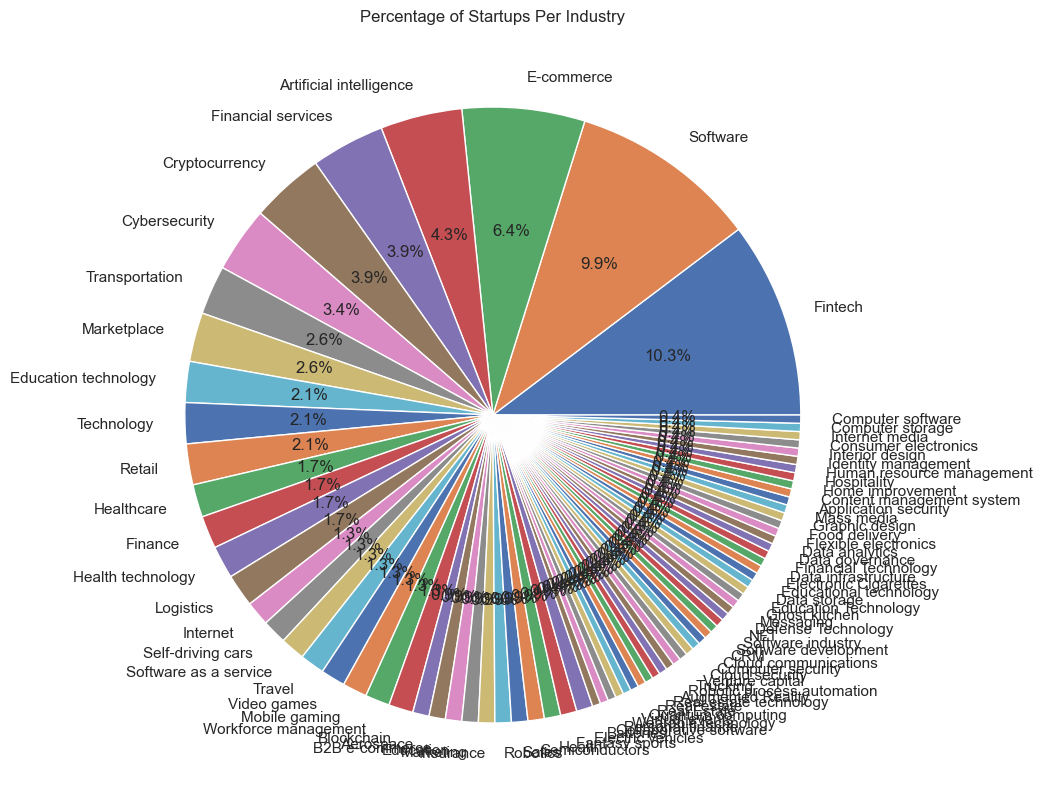

In [111]:
count_per_industry = startups_df.groupby('Industry').size().sort_values(ascending=False)
count_per_industry.plot.pie(autopct='%1.1f%%', figsize=(20,10))
plt.title('Percentage of Startups Per Industry')
plt.show()

Among the top we can see <b>Fintech, Software, and E-commerce</b>. They are however not particularly dominant compared to the other industries seeing that they are only 2-8% larger than the others. This tells us that the industry for top startups are wide.

Going back to the question "1. what industry has the most startups?", the answer is <b>Fintech</b> which comprises of <b>10.3%</b> of all the industries.


### 4.2 Total Value Analysis
We want to calculate the total value of all startups. We will then analyze the distribution of startup values using descriptive statistics and visualizations.

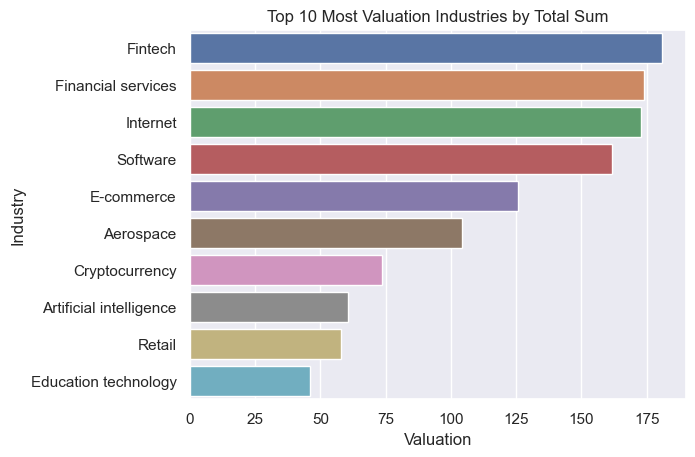

In [112]:
total_value_per_industry = startups_df.groupby('Industry')['Valuation'].sum().reset_index()

sns.barplot(data=total_value_per_industry.sort_values(by='Valuation',ascending=False).iloc[:10], x='Valuation', y='Industry')
plt.title('Top 10 Most Valuation Industries by Total Sum')
plt.show()

We have computed the total valuation per industry so we can now answer the question "2. What is the total value of these startups ?". We can observe that <b>Fintech, Financial Services, Internet, and Software</b> are among those that were <u>leading by about 30 valuation higher</u> than others.


With that said, these are the <b>collective sum</b> of valuations per industry. This means that those industries with high valued startups but <b>less in number</b> may have <b>lower total valuation</b>, while those industries with low valued startups but <b>more in number</b> have <b>higher total valuation</b>.

Let us try to instead look at the average per industry.

In [113]:
# show top valuation by mean
mean_value_per_industry = startups_df.groupby('Industry')['Valuation'].describe().reset_index()
mean_value_per_industry.sort_values(by='mean', ascending=False)

,Industry,count,mean,std,min,25%,50%,75%,max
48,Internet,3.0,57.666667,72.569507,3.00,16.50,30.00,85.00,140.00
0,Aerospace,2.0,52.100000,67.740830,4.20,28.15,52.10,76.05,100.00
38,Graphic design,1.0,40.000000,NaN,40.00,40.00,40.00,40.00,40.00
33,Financial services,9.0,19.322222,30.200115,2.40,3.50,5.50,25.00,95.00
32,Financial Technology,1.0,13.400000,NaN,13.40,13.40,13.40,13.40,13.40
...,...,...,...,...,...,...,...,...,...
55,Mobile gaming,3.0,2.866667,0.513160,2.30,2.65,3.00,3.15,3.30
42,Home improvement,1.0,2.800000,NaN,2.80,2.80,2.80,2.80,2.80
75,Trucking,1.0,2.750000,NaN,2.75,2.75,2.75,2.75,2.75
7,CRM,1.0,2.630000,NaN,2.63,2.63,2.63,2.63,2.63


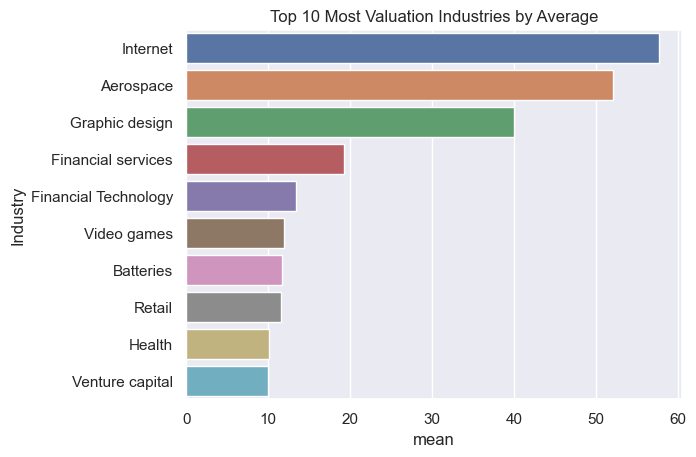

In [114]:
sns.barplot(data=mean_value_per_industry.sort_values(by='mean',ascending=False).iloc[:10], x='mean', y='Industry')
plt.title('Top 10 Most Valuation Industries by Average')
plt.show()

We see now that <b>Internet and Aerospace</b> which were also in the previous ranking are still here and are not the top. Moreover, <b>Graphic design</b> now also seems to be at the top in most valued if we sort them by average.

### 4.3 AI startups Analysis
We want to determine the number of AI companies among the top ~~250~~ 233 startups.

First we get all startups that are in AI industry.

In [115]:
ai_startups = startups_df[startups_df['Industry'] == 'Artificial intelligence']
ai_startups.head()

,Company,Valuation,Industry,Country
30,SenseTime,12.00,Artificial intelligence,China/Hong Kong
65,Scale AI,7.30,Artificial intelligence,United States
66,Argo AI,7.25,Artificial intelligence,United States
67,Gong,7.25,Artificial intelligence,United States
75,DataRobot,6.30,Artificial intelligence,United States


And now we can simply count the number of companies. One company might have multiple startups so we will count the only 1 instance of each company.


So, 3. How many AI companies are in the top 250 startup companies ?

In [116]:
ai_companies_count = ai_startups['Company'].nunique()
ai_companies_percentage = ai_companies_count/len(startups_df)*100

print(f"There are {ai_companies_count} AI companies in the top 233 startup companies which is {ai_companies_percentage:.2f}% of all startups.")

There are 10 AI companies in the top 233 startup companies which is 4.29% of all startups.


## 5. Conclusion

In conclusion, our analysis of the top startups from 2022 has <u>provided valuable insights into the industry distribution, total valuations, and presence of AI companies among the top performers</u>. Regarding the industry analysis, we found that <b>Fintech emerged as the most prominent industry</b>, comprising <b>10.3%</b> of all startups. However, it is important to note that no single industry demonstrated overwhelming dominance, as the top industries were only marginally larger than others, indicating a diverse landscape for top startups.

Turning our attention to the total value analysis, we observed that industries such as <b>Fintech, Financial Services, Internet, and Software exhibited higher valuations</b> compared to others, leading by approximately 30 valuations. It is worth noting that the total valuation of an industry may not solely depend on the number of startups but also on their individual valuations. Thus, industries with fewer but higher-valued startups may have a lower total valuation, while industries with more startups but lower individual valuations can accumulate higher total valuations. Moreover, when considering average valuations per industry, Internet, Aerospace, and Graphic Design emerged as notable industries, with Graphic Design showcasing significant average valuation potential.

In terms of AI startups, we found that among the top 250 startups, there were <b>10 AI companies</b>, accounting for approximately 4.29% of all startups. While AI companies represent a relatively small portion of the top performers, their presence showcases the growing influence of AI-driven innovation in the startup landscape.

Our analysis focused on the top 250 startups from 2022, but it is important to consider that additional features and factors could further enhance our understanding of the startup ecosystem. Exploring aspects such as <b>funding rounds, team composition, or geographical factors</b> could provide further insights into the success and growth potential of startups.

By gaining insights into industry trends, valuations, and the presence of AI companies, businesses, investors, and entrepreneurs can make more informed decisions, identify potential investment opportunities, and understand the dynamics shaping the startup landscape. The results of this analysis underscore the importance of continuously monitoring and adapting to the ever-evolving startup ecosystem to harness its potential for innovation and growth.